In [19]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import time
%matplotlib inline
import tensorflow
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.layers.advanced_activations import LeakyReLU, PReLU
from keras.optimizers import Adam
#from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
#import pandas

In [2]:
t=time.time()
train_data = np.array(list(np.loadtxt("train.csv", delimiter=","))).astype("float32")
train_labels = np.array(list(np.loadtxt("train_label.csv", delimiter=","))).astype("float32")
eval_data = np.array(list(np.loadtxt("eval.csv", delimiter=","))).astype("float32")
eval_labels = np.array(list(np.loadtxt("eval_label.csv", delimiter=","))).astype("float32")

#eval_data = pandas.read_csv("eval.csv", delimiter=",",header=None,dtype='float32')
#eval_labels = pandas.read_csv("eval_label.csv", delimiter=",",header=None,dtype='float32')
print(time.time()-t)

523.8856117725372


In [3]:
t=time.time()
test_data = np.array(list(np.loadtxt("H4_CG.csv", delimiter=","))).astype("float32")
test_labels = np.array(list(np.loadtxt("H4CG_label.csv", delimiter=","))).astype("float32")
print(np.shape(test_data),np.shape(test_labels))
print(time.time()-t)

(400, 1728) (400, 4)
1.3678913116455078


In [89]:
x_train = train_data.reshape(-1, 24,24,3)
x_val = eval_data.reshape(-1, 24,24,3)
x_test = test_data.reshape(-1, 24,24,3)

y_train = train_labels.reshape(-1, 22,22,1)
y_val = eval_labels.reshape(-1, 22,22,1)
#y_test = test_label.reshape(-1, 22,22,1)

In [90]:
model = Sequential()

model.add(Conv2D(filters = 1, kernel_size = (3, 3), activation='tanh', input_shape = (24, 24, 3)))
#model.add(BatchNormalization())
#model.add(Conv2D(filters = 1, kernel_size = (1, 1), activation='tanh', padding='same'))
#model.add(BatchNormalization())

In [91]:
model.compile(loss='mean_squared_error', optimizer = Adam(lr=1e-4))#, metrics=["accuracy"]) #binary_crossentropy

In [92]:
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

In [93]:
hist = model.fit(x=x_train, y=y_train, batch_size=512,
                           epochs=10, #Increase this when not on Kaggle kernel
                           verbose=2,  #1 for ETA, 0 for silent
                           validation_data=(x_val, y_val), #For speed
                           callbacks=[annealer])

Train on 64000 samples, validate on 16000 samples
Epoch 1/10
 - 8s - loss: 0.0878 - val_loss: 0.0492
Epoch 2/10
 - 7s - loss: 0.0324 - val_loss: 0.0199
Epoch 3/10
 - 7s - loss: 0.0142 - val_loss: 0.0101
Epoch 4/10
 - 8s - loss: 0.0080 - val_loss: 0.0064
Epoch 5/10
 - 7s - loss: 0.0056 - val_loss: 0.0050
Epoch 6/10
 - 8s - loss: 0.0046 - val_loss: 0.0043
Epoch 7/10
 - 7s - loss: 0.0041 - val_loss: 0.0040
Epoch 8/10
 - 7s - loss: 0.0039 - val_loss: 0.0038
Epoch 9/10
 - 7s - loss: 0.0038 - val_loss: 0.0038
Epoch 10/10
 - 7s - loss: 0.0037 - val_loss: 0.0037


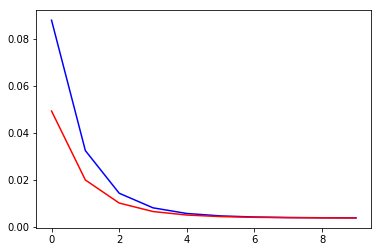

In [94]:
plt.plot(hist.history['loss'], color='b')
plt.plot(hist.history['val_loss'], color='r')
plt.show()

In [95]:
y_hat = model.predict(x_val)

In [96]:
print(np.shape(y_val),np.shape(y_hat))
(np.sum((y_val-y_hat)**2)/(20*20*40))**0.5

(16000, 22, 22, 1) (16000, 22, 22, 1)


1.3428540345129893

In [39]:
y_val=np.reshape(y_val,(20,20,40))
y_hat=np.reshape(y_hat,(20,20,40))

plt.imshow(y_val[:,:,20])
plt.show()
plt.imshow(y_hat[:,:,20])
plt.show()

print(np.shape(y_hat))

ValueError: cannot reshape array of size 7744000 into shape (20,20,40)

In [ ]:
y_hat = model.predict(x_test)

In [ ]:
#Error Analysis
n=len(y_test)
print(np.mean(y_hat-y_test))

print((np.sum((y_hat-y_test)**2)/(n))**0.5)

In [ ]:
(np.sum(np.sum((y_test-y_hat)**2,axis=0),axis=0)/(20*20))**0.5

In [308]:
y_test=np.reshape(y_test,(20,20))
y_hat=np.reshape(y_hat,(20,20))

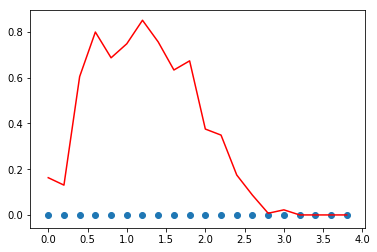

In [309]:
x=np.arange(0,4,4/20)
plt.plot(x,y_test[:,19],'r')
plt.scatter(x,y_hat[:,19])
plt.show()

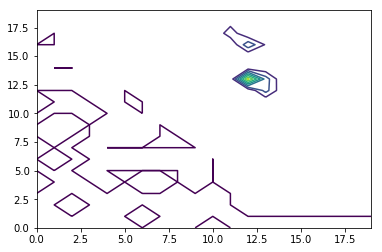

In [310]:
plt.contour(y_hat)

In [97]:
W=model.get_weights()

In [98]:
for layer in model.layers:
    g=layer.get_config()
    h=layer.get_weights()
    print(g)
    print(h)

{'name': 'conv2d_18', 'trainable': True, 'batch_input_shape': (None, 24, 24, 3), 'dtype': 'float32', 'filters': 1, 'kernel_size': (3, 3), 'strides': (1, 1), 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'activation': 'tanh', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
[array([[[[-8.1317371e-04],
         [ 5.1146219e-03],
         [ 6.5396344e-03]],

        [[ 2.2287475e-02],
         [-9.8511798e-04],
         [-1.8057708e-02]],

        [[-1.0302169e-03],
         [-4.6328022e-03],
         [ 7.9389019e-03]]],


       [[[-6.7465684e-05],
         [ 2.2198537e-02],
         [-1.0959053e-03]],

        [[-5.9630307e-03],
         [ 5.6676039e-05],

In [101]:
for i in range(2):
    print(np.shape(W[i]))

(3, 3, 3, 1)
(1,)


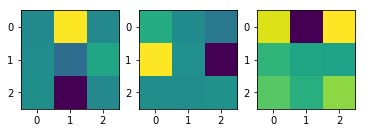

[array([-0.00958441], dtype=float32)]


In [100]:
plt.subplot(131)
plt.imshow(W[0][:,:,0,0])
plt.subplot(132)
plt.imshow(W[0][:,:,1,0])
plt.subplot(133)
plt.imshow(W[0][:,:,2,0])
plt.show()
print(W[1:])

In [315]:
np.savetxt('Weight.csv',np.reshape(W[0],(1,-1)),delimiter=',')

In [316]:
from keras import backend as K

inp = model.input                                           # input placeholder
outputs = [layer.output for layer in model.layers]          # all layer outputs
functors = [K.function([inp, K.learning_phase()], [out]) for out in outputs]    # evaluation functions

In [317]:
print(K.learning_phase())
for i in range(16):
    print(outputs[i])

Tensor("batch_normalization_1/keras_learning_phase:0", shape=(), dtype=bool)
Tensor("conv2d_52/Relu:0", shape=(?, 19, 19, 16), dtype=float32)
Tensor("batch_normalization_49/cond/Merge:0", shape=(?, 19, 19, 16), dtype=float32)
Tensor("conv2d_53/Relu:0", shape=(?, 17, 17, 16), dtype=float32)
Tensor("batch_normalization_50/cond/Merge:0", shape=(?, 17, 17, 16), dtype=float32)
Tensor("max_pooling2d_34/MaxPool:0", shape=(?, 8, 8, 16), dtype=float32)
Tensor("dropout_71/cond/Merge:0", shape=(?, 8, 8, 16), dtype=float32)
Tensor("conv2d_54/Relu:0", shape=(?, 6, 6, 32), dtype=float32)
Tensor("batch_normalization_51/cond/Merge:0", shape=(?, 6, 6, 32), dtype=float32)
Tensor("conv2d_55/Relu:0", shape=(?, 4, 4, 32), dtype=float32)
Tensor("batch_normalization_52/cond/Merge:0", shape=(?, 4, 4, 32), dtype=float32)
Tensor("max_pooling2d_35/MaxPool:0", shape=(?, 2, 2, 32), dtype=float32)
Tensor("dropout_72/cond/Merge:0", shape=(?, 2, 2, 32), dtype=float32)
Tensor("flatten_19/Reshape:0", shape=(?, ?), dtyp

In [318]:
# Testing
#test = x_test[10,:,:,:][np.newaxis,...]
test=np.random.rand(1,24,24,3)
layer_outs = [func([test, 0]) for func in functors]
#print(layer_outs)

In [319]:
for i in range(20):
    print(np.shape(layer_outs[i]))

(1, 1, 19, 19, 16)
(1, 1, 19, 19, 16)
(1, 1, 17, 17, 16)
(1, 1, 17, 17, 16)
(1, 1, 8, 8, 16)
(1, 1, 8, 8, 16)
(1, 1, 6, 6, 32)
(1, 1, 6, 6, 32)
(1, 1, 4, 4, 32)
(1, 1, 4, 4, 32)
(1, 1, 2, 2, 32)
(1, 1, 2, 2, 32)
(1, 1, 128)
(1, 1, 2048)
(1, 1, 2048)
(1, 1, 2048)
(1, 1, 512)
(1, 1, 512)
(1, 1, 512)
(1, 1, 1024)


(1, 24, 24, 3)


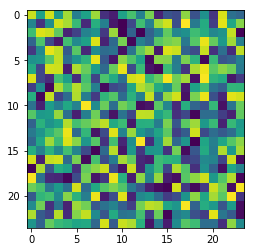

(1, 1, 19, 19, 16) 7.5127034


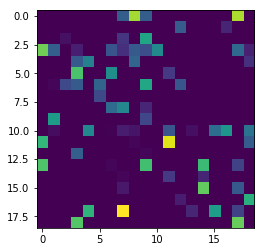

(1, 1, 19, 19, 16) -191.24802


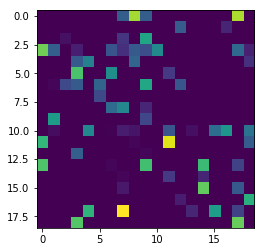

(1, 1, 17, 17, 16) 69.89182


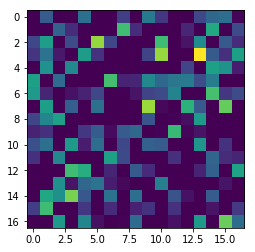

(1, 1, 17, 17, 16) -86.77472


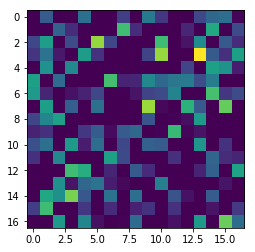

(1, 1, 8, 8, 16) 25.455803


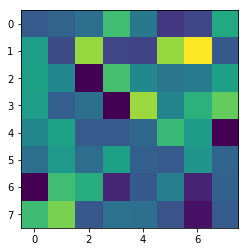

(1, 1, 8, 8, 16) 25.455803


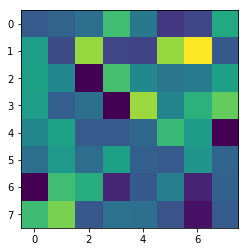

(1, 1, 6, 6, 32) 10.93575


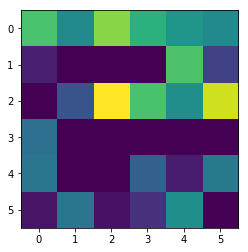

(1, 1, 6, 6, 32) -1.3638282


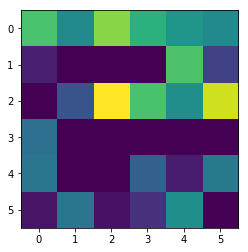

(1, 1, 4, 4, 32) 7.066024


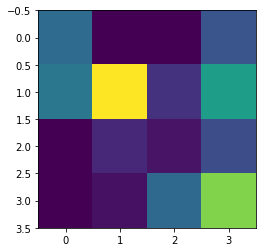

(1, 1, 4, 4, 32) 2.4494896


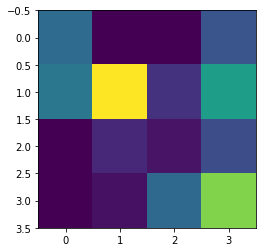

(1, 1, 2, 2, 32) 4.9899244


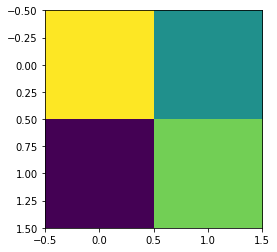

(1, 1, 2, 2, 32) 4.9899244


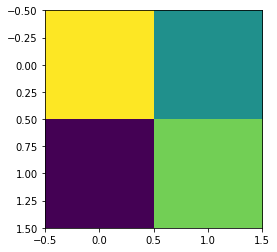

In [320]:
print(np.shape(test))
plt.imshow(test[0,:,:,2])
plt.show()
for i in range(12):
    print(np.shape(layer_outs[i]), np.sum(np.array(layer_outs[i])[0,0,:,:,0]))
    plt.imshow(np.array(layer_outs[i])[0,0,:,:,0])
    plt.show()
    


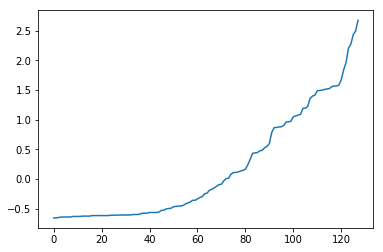

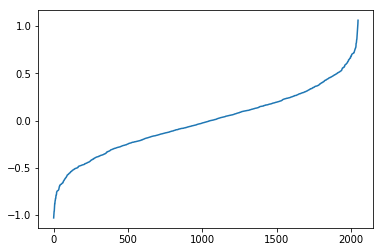

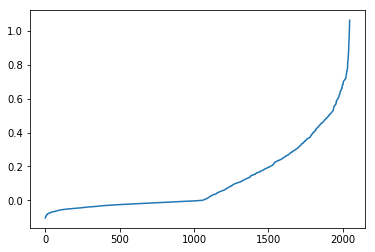

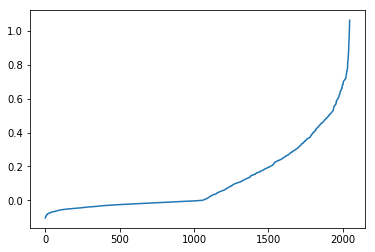

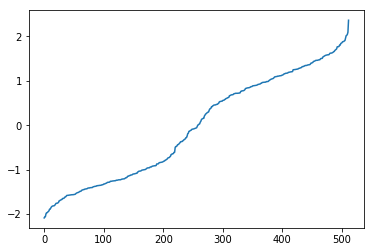

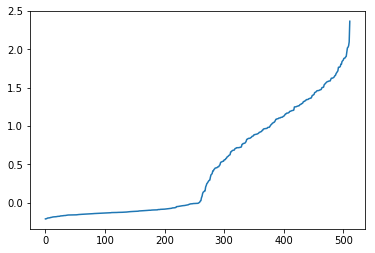

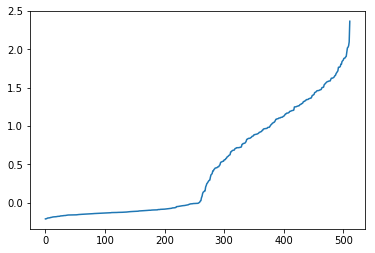

[-1.4002874 -2.1922913  1.9350648 ... -2.3408444 -1.5874015 -1.0232062]


In [321]:
for i in range(12,19):
    plt.plot(np.sort(np.array(layer_outs[i])[0,0,:]))
    plt.show()
print(np.array(layer_outs[19])[0,0,:])

In [322]:
print(K.learning_phase())

Tensor("batch_normalization_1/keras_learning_phase:0", shape=(), dtype=bool)


In [323]:
np.shape(x_test)

(400, 24, 24, 3)